In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

In [8]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v3/train_df_pca.csv")
test_df = pd.read_csv("~/real_estate/data/v3/test_df_pca.csv")

# Split daga
features = train_df.columns[:-1]

X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df["target"].values
y_test = test_df["target"].values

In [9]:
# compile DNN
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=45))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
69798/69798 [==============================] - 113s 2ms/step - loss: 0.0033
Epoch 2/5
69798/69798 [==============================] - 111s 2ms/step - loss: 0.0029
Epoch 3/5
69798/69798 [==============================] - 114s 2ms/step - loss: 0.0028
Epoch 4/5
  320/69798 [..............................] - ETA: 1:59 - loss: 0.0024Traceback (most recent call last):
  File "/home/gnazareths/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-95221f5d794d>", line 9, in <module>
    model.fit(X_train, y_train, epochs=5, batch_size=1)
  File "/home/gnazareths/.local/lib/python3.5/site-packages/keras/engine/training.py", line 1039, in fit
    validation_steps=validation_steps)
  File "/home/gnazareths/.local/lib/python3.5/site-packages/keras/engine/training_arrays.py", line 199, in fit_loop
    outs = f(ins_batch)
  File "/home/gnazareths/.local/lib/python3.5/site

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



KeyboardInterrupt: 

In [10]:
# Save model
# model.save_weights('/home/gnazareths/real_estate/data/supervised_dfs/dnn_weights.h5')

# Load model
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_dim=20))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.load_weights('/home/gnazareths/real_estate/data/supervised_dfs/dnn_weights.h5')

In [10]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train)
errors_test = abs(y_test_hat - y_test)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.043526838190099185
Mean test value:  0.07929045117451608
R^2 test:  0.23923624912196992
---
Mean train error:  0.0383707893140684
Mean train value:  0.08054816873147967
R^2 train:  0.5489544083999244


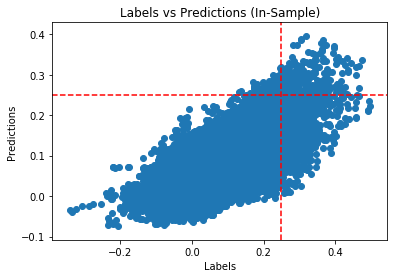

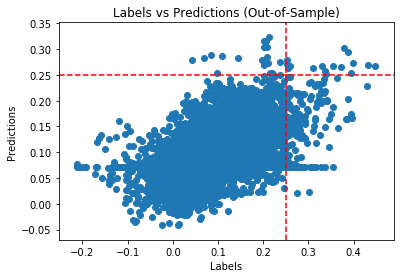

In [13]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()